In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [76]:
fifa21 = pd.read_csv("C:\\Users\\user\\datasets\\players_21.csv")
pd.set_option("max_columns", None) #view all columns
fifa21.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos 

In [77]:
fifa21.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=106)

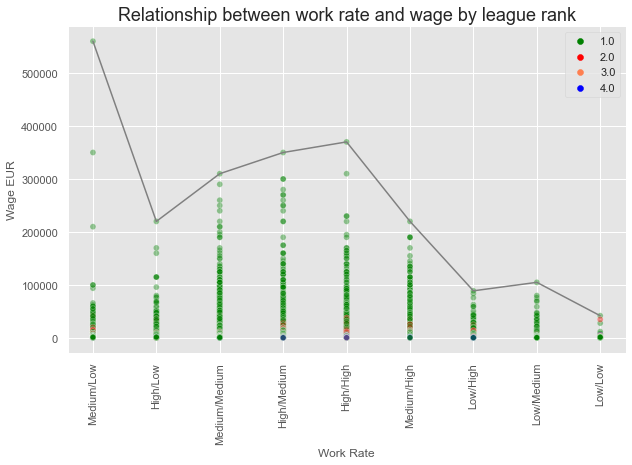

In [79]:
# A relationship between work rate and wage by league rank
plt.style.use("ggplot")
plt.figure(figsize=(10, 6))
#Scatter plot
ax = sns.scatterplot(x ='work_rate',
                    y = fifa21['wage_eur'],
                    hue = "league_rank",
                    data = fifa21,
                     palette = ["green", "red", "coral", "blue"],
                     legend="full",
                     alpha = 0.4
                    )
#Getting the max wage for each work rate
max_wage_eur = fifa21.groupby("work_rate")["wage_eur"].max()
#Making a line plot of max wages
sns.lineplot(data = max_wage_eur,
            ax = ax.axes,
            color="grey")
ax.tick_params(axis= "x", rotation=90)
plt.xlabel("Work Rate")
plt.ylabel("Wage EUR")
plt.title("Relationship between work rate and wage by league rank", fontsize = 18)
plt.show()


In [80]:
# How many nationalities players are there in this dataset?
len(fifa21['nationality'].unique())

162

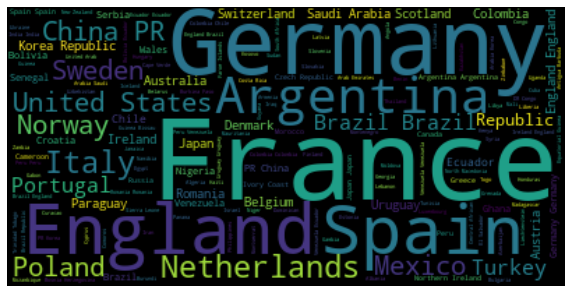

In [81]:
# A word cloud of nationalities will help understand which nationalities are dominating
nationality = " ".join(n for n in fifa21['nationality'])
from wordcloud import WordCloud
plt.figure(figsize=(10, 20))
wc = WordCloud().generate(nationality)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [82]:
# See the top 20 nationalities in terms of the number of players. 
# value_counts function automatically sort the values.
nationality_count = fifa21['nationality'].value_counts()
nationality_count[:20]

England           1685
Germany           1189
Spain             1072
France             984
Argentina          936
Brazil             887
Japan              489
Netherlands        432
Italy              421
United States      378
Sweden             372
China PR           364
Norway             363
Mexico             362
Poland             360
Portugal           353
Uruguay            349
Turkey             344
Korea Republic     341
Colombia           338
Name: nationality, dtype: int64

In [ ]:
fifa21['age'].hist()
plt.title("Distribution of age of the players")


In [83]:
# distribution of age of top nationalities, leagues, and clubs based on the number of players.
top_20_nat= nationality_count.index[:20]
df_nationality = fifa21[fifa21.nationality.isin(top_20_nat)]

clubs_count = fifa21['club_name'].value_counts()
top_20_club = clubs_count[:20].index
df_clubs = fifa21[fifa21.club_name.isin(top_20_club)]

league_count = fifa21['league_name'].value_counts()
top_20_leagues = league_count[:20].index
df_league = fifa21[fifa21.league_name.isin(top_20_leagues)]

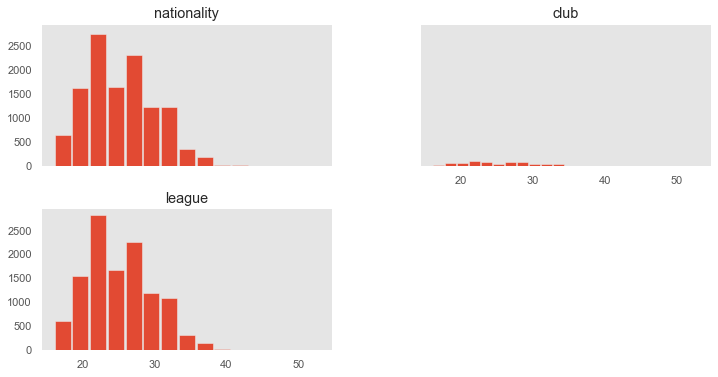

In [84]:
pd.DataFrame({'nationality': df_nationality['age'], 
              'club': df_clubs['age'], 
              'league': df_league['age']}).hist(bins = 15,
                                                  figsize=(12, 6),
                                                  grid=False,
                                                  rwidth=0.9,
                                                  sharex=True,
                                                  sharey=True)
plt.show()


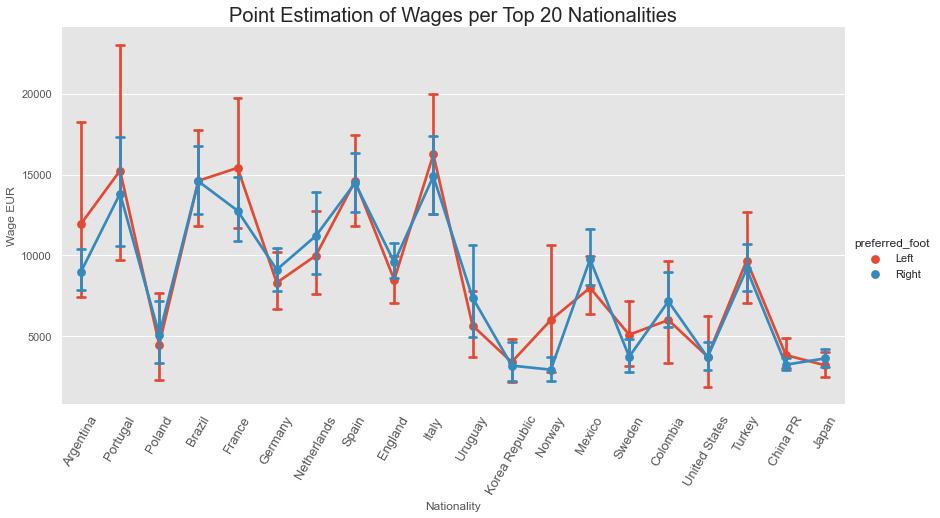

In [85]:
# Estimation of wages for each nationality using the top 20 nationalities DataFrame we created
ax = sns.catplot(x = 'nationality', y = 'wage_eur', data = df_nationality,
                hue = 'preferred_foot', height=6, aspect=2,
                capsize=0.2, kind='point')
plt.xlabel("Nationality", fontsize=12)
plt.ylabel("Wage EUR", fontsize=12)
plt.title("Point Estimation of Wages per Top 20 Nationalities", fontsize=20)
plt.xticks(rotation = 60, fontsize=13)
plt.show()

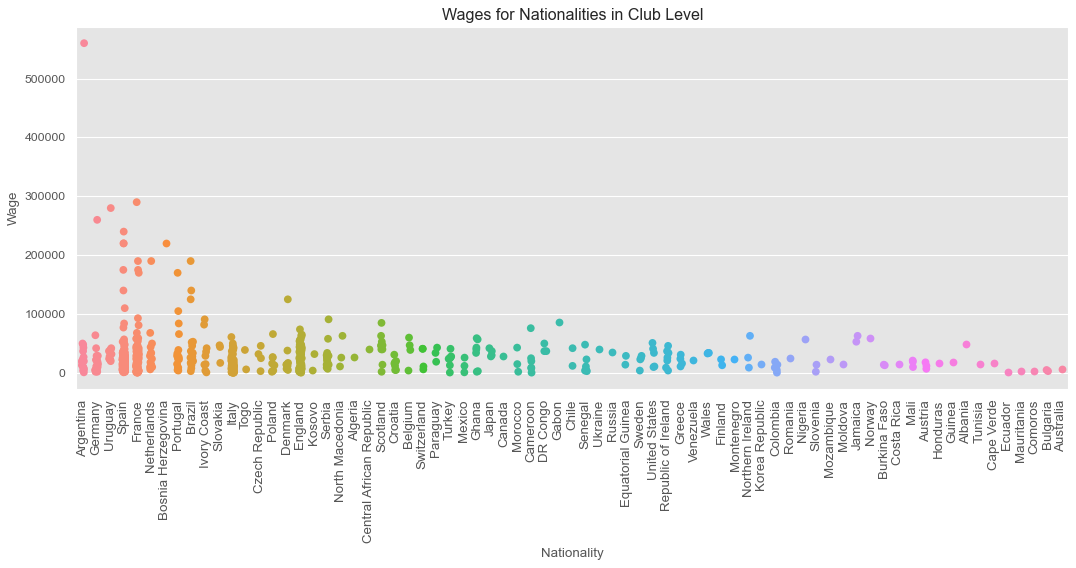

In [86]:
# The top 20 nationality players' wages at the club level.
fig, ax = plt.subplots(figsize=(16, 6), dpi=80)
sns.stripplot(x = "nationality", y = "wage_eur",
              data=df_clubs, size = 7, ax=ax)
plt.tick_params(axis='x', which='major', labelsize=12, rotation=90)
plt.xlabel("Nationality")
plt.ylabel("Wage")
plt.title("Wages for Nationalities in Club Level")
plt.show()


In [87]:
# wages for national_position by international reputation. 
def make_dict(col):
    dictn = {}
    val = 0
    for i in col.unique():
        if i not in dictn:
            dictn[i] = val+1
            val += 1
    return dictn

In [88]:
# Make a new column named nation_position1 where data type will be integers
new_nation_position= make_dict(fifa21['nation_position'])
fifa21['nation_position1'] = fifa21['nation_position'].replace(new_nation_position)

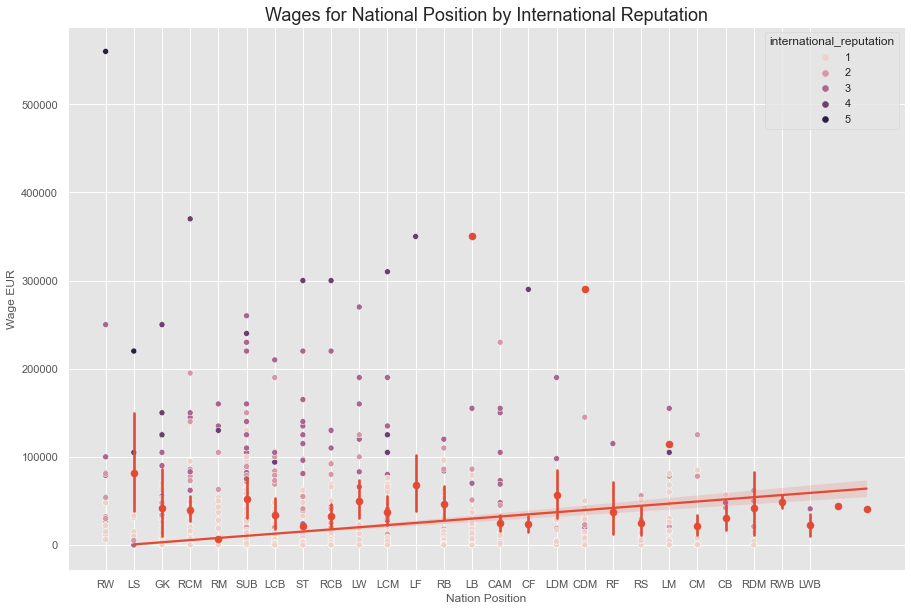

In [89]:
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x= fifa21['nation_position'],
                    y = fifa21['wage_eur'],
                    hue = fifa21['international_reputation'],
                    legend = "full",
                    data = fifa21,
                    x_jitter = 1000)
ax = sns.regplot(x= 'nation_position1',
                  y = fifa21['wage_eur'],
                  data = fifa21,
                  ax=ax.axes,
                 x_estimator=np.mean
                 )
plt.xlabel("Nation Position")
plt.ylabel("Wage EUR")
plt.title("Wages for National Position by International Reputation", fontsize=18)
plt.show()

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.

  warnings.warn(msg, FutureWarning)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.

  warnings.warn(msg, FutureWarning)


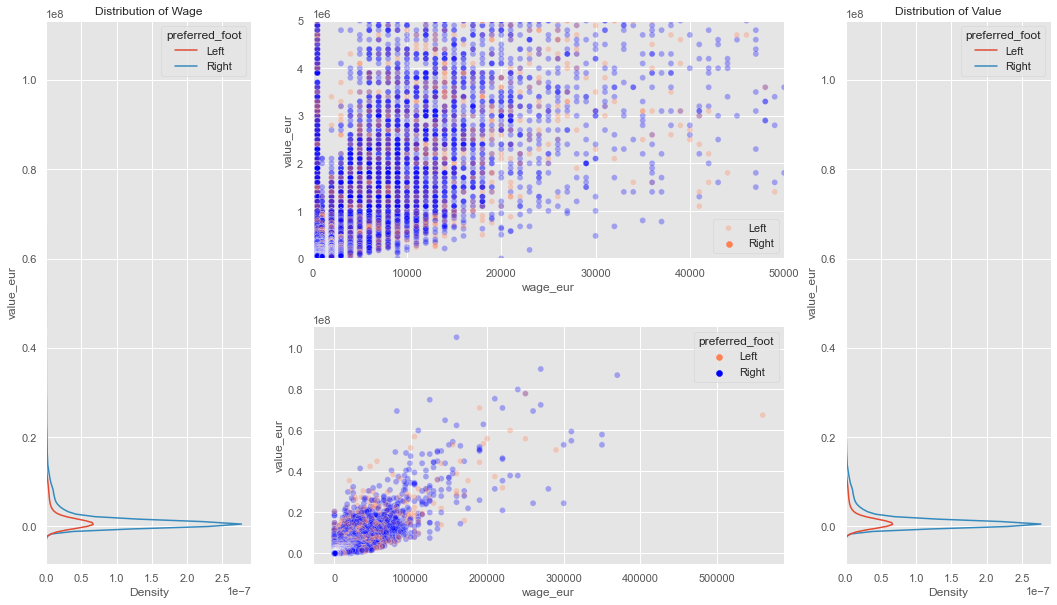

In [90]:
# The next plot explores the relationship between wage and value of the players 
# and also if there is any effect of the preferred foot on those two features.

plt.figure(figsize = (18, 10))
grid = plt.GridSpec(4, 4, wspace =0.3, hspace = 0.8)
g1 = plt.subplot(grid[:, 0])
g2 = plt.subplot(grid[:2, 1:3])
g3 = plt.subplot(grid[2:, 1:3])
g4 = plt.subplot(grid[:, 3])
g1.set_title("Distribution of Wage", fontsize=12)
sns.kdeplot(x = "value_eur", hue="preferred_foot", 
            vertical=True,
            data=fifa21, ax=g1)
sns.scatterplot(x = "wage_eur", y = "value_eur",
              hue = "preferred_foot", alpha = 0.3,
                palette=['coral', 'blue'], 
                data = fifa21, ax=g2)
g2.set_xlim(0, 50000)
g2.set_ylim(0, 0.05*1e8)
g2.legend(['Left', 'Right'])
sns.scatterplot(x = "wage_eur", y = "value_eur",
              hue = "preferred_foot", alpha = 0.3,
              palette=['coral', 'blue'],   
              data = fifa21, ax=g3)
g4.set_title("Distribution of Value", fontsize=12)
sns.kdeplot(x = "value_eur", hue="preferred_foot",
            vertical=True,
            data=fifa21, ax=g4)
plt.show()

<Figure size 864x576 with 0 Axes>

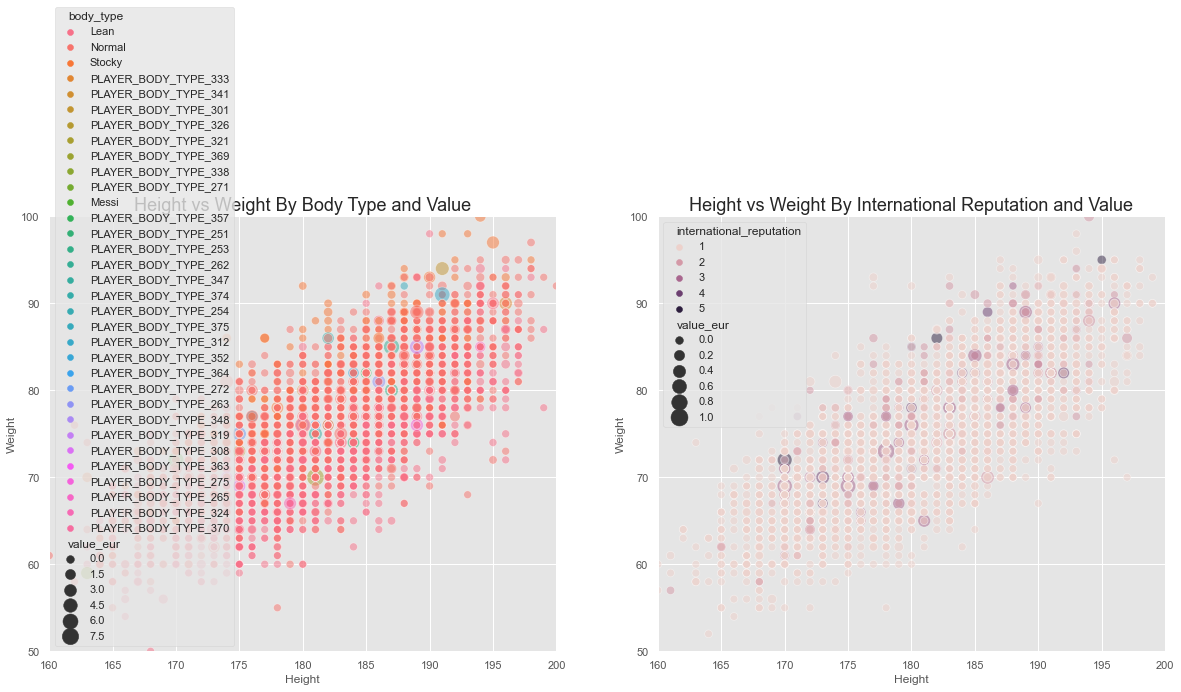

In [91]:
# Is there any correlation between height/weight and internal reputation? 
plt.figure(figsize=(12, 8))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
#fig.suptitle("International Reputation and Value with Height and Weight, and Body Type")
sns.scatterplot(x = "height_cm", y = "weight_kg", 
                 hue = "body_type",
                     alpha = 0.5, size = "value_eur", sizes = (60, 300),
                 data = fifa21.sample(frac=0.25), ax=ax1)
ax1.set_ylim([50, 100])
ax1.set_xlim([160, 200])
ax1.set_title("Height vs Weight By Body Type and Value",fontsize=18)
ax1.set_xlabel("Height")
ax1.set_ylabel("Weight")
sns.scatterplot(x = "height_cm", y = "weight_kg", 
                 hue = "international_reputation",
                     alpha = 0.5, size = "value_eur", sizes = (60, 300),
                 data = fifa21.sample(frac=0.25), ax=ax2)
ax2.set_ylim([50, 100])
ax2.set_xlim([160, 200])
ax2.set_title("Height vs Weight By International Reputation and Value",fontsize=18)
ax2.set_xlabel("Height")
ax2.set_ylabel("Weight")
plt.show()

In [92]:
fifa21['international_reputation'].value_counts()

1    17593
2     1017
3      285
4       43
5        6
Name: international_reputation, dtype: int64

<Figure size 1080x720 with 0 Axes>

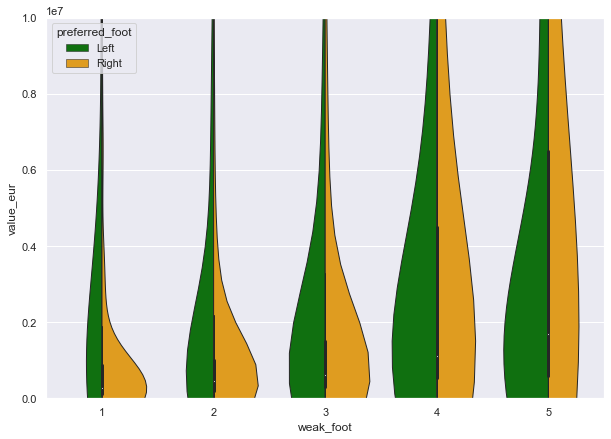

In [93]:
# How weak foot relates to value segregated by preferred foot
plt.figure(figsize=(15, 10))
sns.set()
_, ax = plt.subplots(figsize=(10, 7))
sns.violinplot(x="weak_foot",
              y="value_eur",
              hue = "preferred_foot",
              data=fifa21,
              split=True,
              bw=.4,
              cut = 0.2,
              linewidth=1,
              palette=sns.color_palette(["green", "orange"]))
ax.set(ylim = (-0.1, 1*1e7))  # I used a ‘ylim’ parameter to exclude the outliers. 
plt.show()

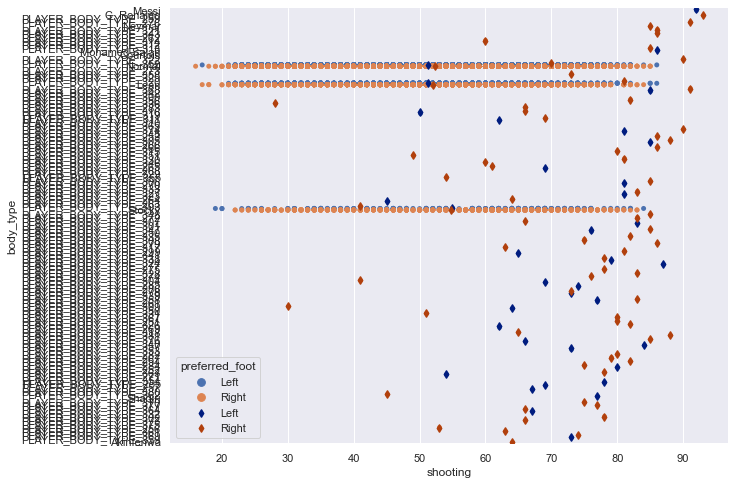

In [94]:
# Explore the relationship between body type and shooting. 
# It will also be good to separate them by preferred foot.
_, ax = plt.subplots(figsize=(10, 8))
sns.despine(bottom=True, left=True)
sns.stripplot(x = "shooting",
       y = "body_type",
       hue = "preferred_foot",
       data = fifa21,
       dodge = 0.8, zorder=1)

# The point represents the central tendencies of the groups.
sns.pointplot(x = "shooting",
              y = "body_type",
              hue = "preferred_foot",
              data=fifa21, dodge=0.5, join=False,
              palette="dark", markers="d",
              scale=0.75, ci=None)
handles, labels = ax.get_legend_handles_labels()

In [95]:
nat_dictn = make_dict(fifa21['nation_position'])
fifa21['nation_position1'] = fifa21['nation_position'].replace(nat_dictn)

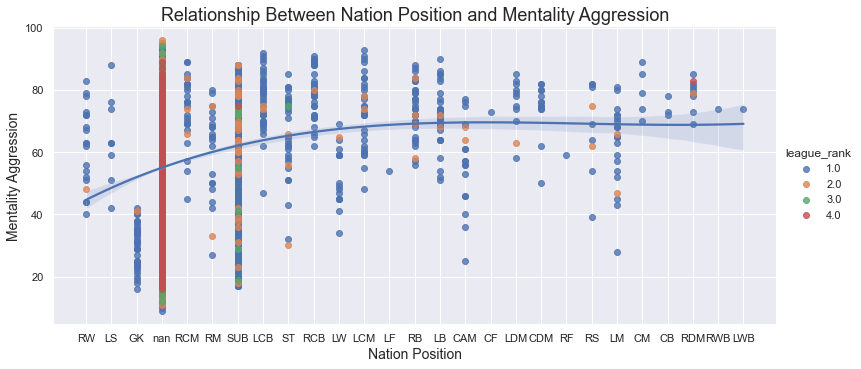

In [96]:
ax = sns.lmplot(x = "nation_position1",
               y = "mentality_aggression",
               data = fifa21, hue = "league_rank", fit_reg = False, height = 5, aspect = 2.2)
sns.regplot(x = "nation_position1",
               y = "mentality_aggression",
               data = fifa21, scatter=False, ax=ax.axes[0, 0], order = 3)
plt.ylabel("Mentality Aggression")
plt.xticks(list(range(1,28)), list(fifa21['nation_position'].unique()))
plt.title("Relationship Between Nation Position and Mentality Aggression", fontsize=18)
plt.xlabel("Nation Position", fontsize=14)
plt.ylabel("Mentality Aggression", fontsize=14)
plt.show()

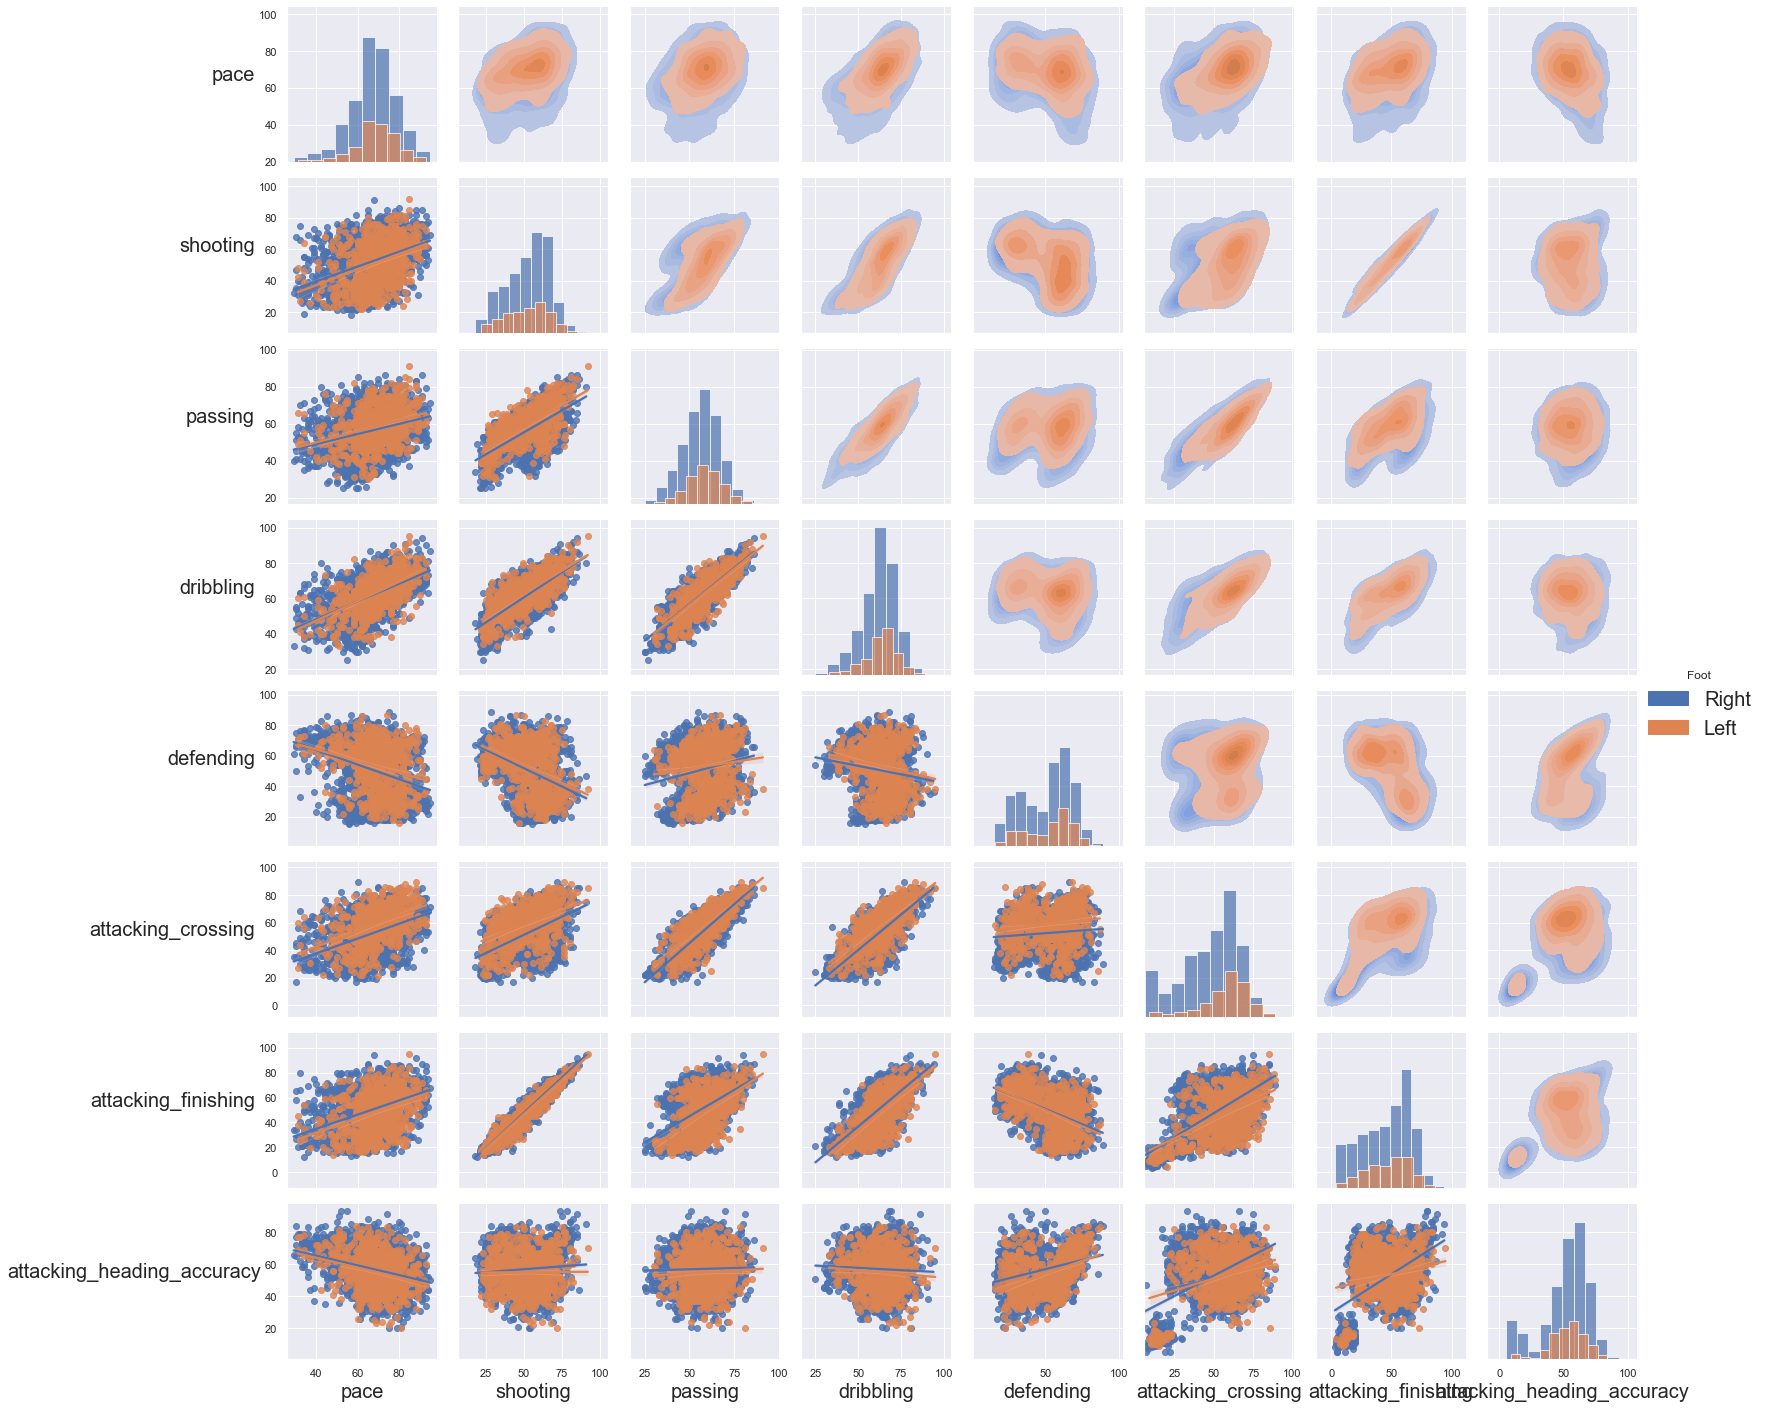

In [97]:
# When we have this big of a dataset and a lot of continuous variables, I find it helpful to make a pair plot.
sns.set(color_codes=True)
plt.rcParams["axes.labelsize"] = 20
g1 = sns.PairGrid(fifa21.sample(frac = 0.2), vars = ['pace', 'shooting',
       'passing', 'dribbling', 'defending', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy'],
              hue = 'preferred_foot')
g1.map_lower(sns.regplot)
g1.map_diag(plt.hist, alpha=0.7)
g1.map_upper(sns.kdeplot, shade=True)
g1.add_legend(title='Foot', fontsize=20)
for axes in g1.axes.flat:
     axes.set_ylabel(axes.get_ylabel(), rotation=0, horizontalalignment='right')

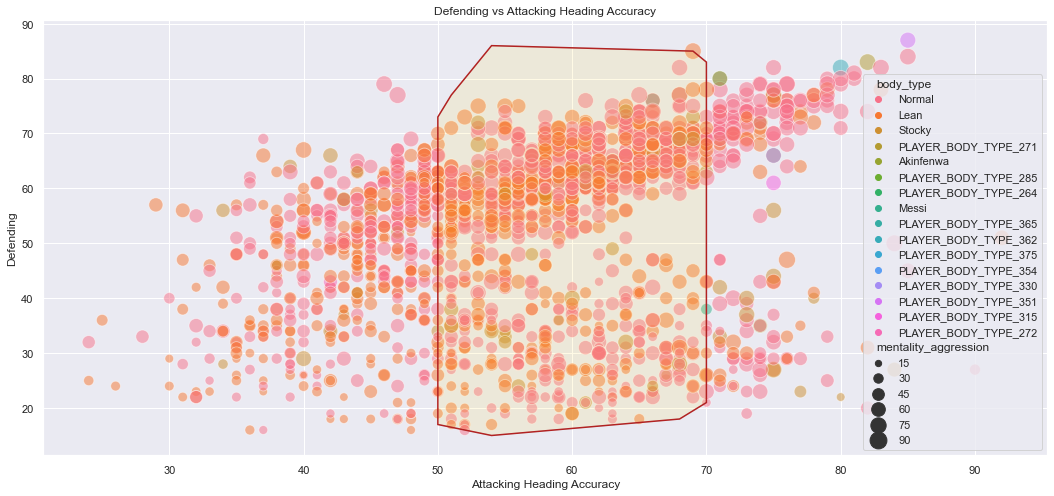

In [98]:
df2 = fifa21[['attacking_heading_accuracy', 'defending', 'body_type', 'mentality_aggression']]
df_encircle=df2[(df2['attacking_heading_accuracy'] >=50) & (df2['attacking_heading_accuracy'] <=70)].dropna()
df_encircle
from scipy.spatial import ConvexHull
plt.figure(figsize=(18, 8))
ax = sns.scatterplot(x = "attacking_heading_accuracy", y = "defending", 
                 hue = "body_type",
                     alpha = 0.5, size = "mentality_aggression", sizes = (20, 300),
                 data = fifa21.sample(frac=0.10))
def encircle(x, y, ax=None, **kw):
    if not ax:
        ax=plt.gca()
        p=np.c_[x, y]
        hull = ConvexHull(p)
        poly=plt.Polygon(p[hull.vertices, :], **kw)
        ax.add_patch(poly)
        
encircle(df_encircle.attacking_heading_accuracy, df_encircle.defending,
        ec = "k", fc="gold",
        alpha = 0.1)
encircle(df_encircle.attacking_heading_accuracy, df_encircle.defending,
        ec = "firebrick", fc="None",
        linewidth = 1.5)
plt.xlabel("Attacking Heading Accuracy", fontsize=12)
plt.ylabel("Defending", fontsize=12)
plt.title("Defending vs Attacking Heading Accuracy")
plt.show()

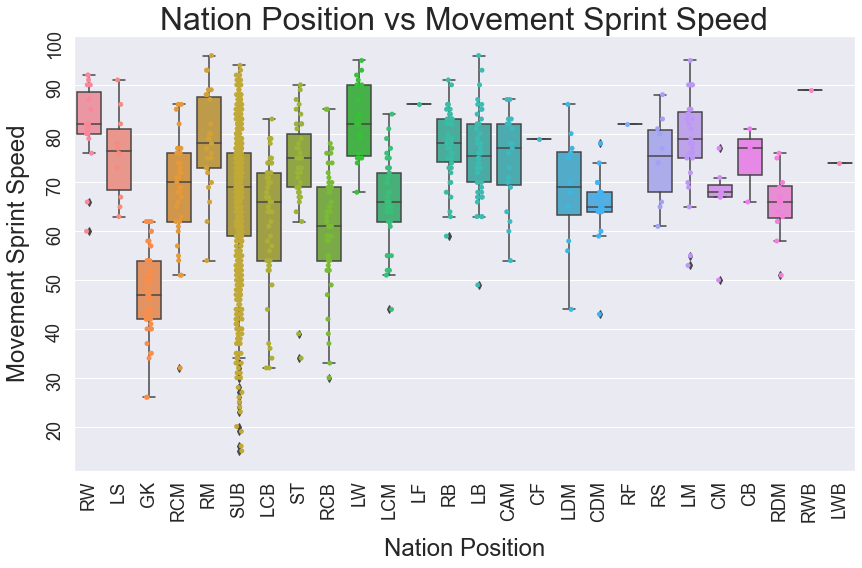

In [99]:
fig, ax = plt.subplots(figsize=(14, 8))
ax = sns.boxplot(x = 'nation_position', y = "movement_sprint_speed",
                data = fifa21)
ax.tick_params(rotation=90, labelsize=18)
ax = sns.stripplot(x = 'nation_position', y = "movement_sprint_speed", data=fifa21)
plt.xlabel("Nation Position", labelpad = 16, fontsize=24)
plt.ylabel("Movement Sprint Speed", labelpad = 16, fontsize=24)
plt.title("Nation Position vs Movement Sprint Speed", fontsize=32)
plt.show()

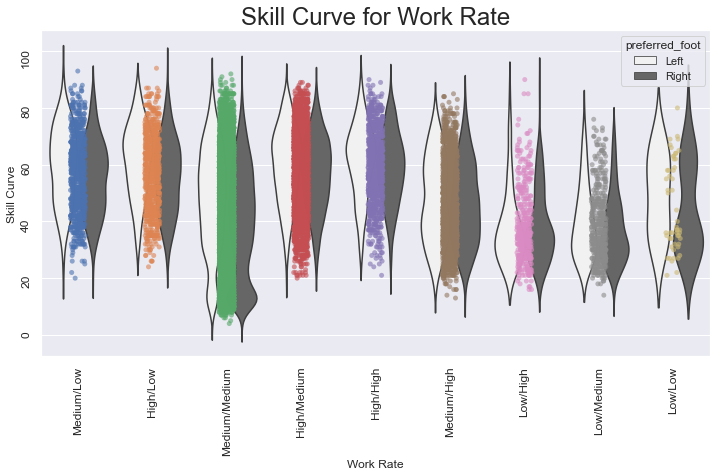

In [100]:
fig, ax = plt.subplots(figsize=(12, 6))
ax=sns.violinplot(x = "work_rate", y = "skill_curve", hue="preferred_foot",
                 data=fifa21, inner=None, color = "0.4")
ax = sns.stripplot(x = "work_rate", y = "skill_curve", alpha = 0.6, data=fifa21)
ax.tick_params(rotation=90, labelsize=12)
plt.xlabel("Work Rate", fontsize = 12)
plt.ylabel("Skill Curve", fontsize = 12)
plt.title("Skill Curve for Work Rate", fontsize=24)
plt.show()

C:\Users\user\AppData\Local\Temp/ipykernel_8368/955075536.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator

  ax.set_xticklabels(d1.nationality, rotation=90)


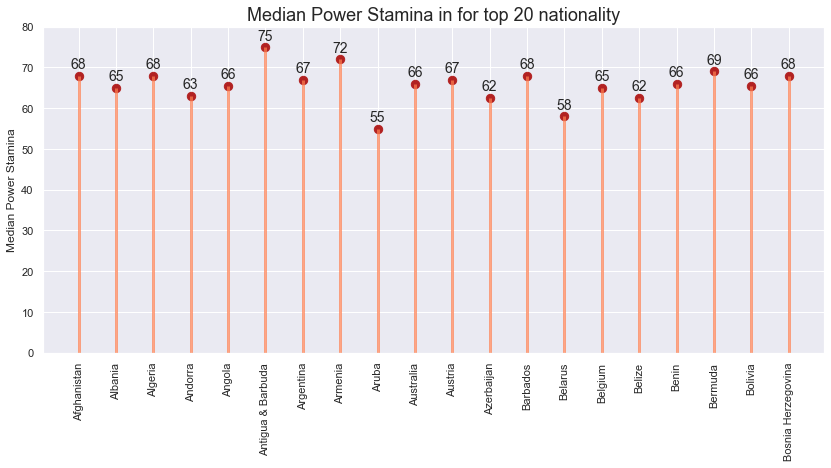

In [101]:
d = fifa21.groupby('nationality')['power_stamina'].agg([np.median])
d1 = d[:20].reset_index()
d1 = d1.rename(columns={"median": 'power_stamina'})
fig, ax = plt.subplots(figsize=(14, 6))
ax.vlines(x=d1['nationality'], ymin=0, ymax = d1.power_stamina,
        color = 'coral', alpha = 0.7, linewidth = 3)
ax.scatter(x = d1["nationality"], y = d1["power_stamina"],
          s = 70, color = "firebrick")
ax.set_ylabel("Median Power Stamina", fontsize = 12)
ax.set_xticklabels(d1.nationality, rotation=90)
ax.set_ylim(0, 80)
ax.set_title("Median Power Stamina in for top 20 nationality", fontsize=18)
for row in d1.itertuples():
    ax.text(row.Index, row.power_stamina+1, s = round(row.power_stamina),
           horizontalalignment = 'center', verticalalignment='bottom', fontsize=14)
plt.show()

In [ ]:
import jovian
jovian.commit(filename="FIFA21.ipynb")

<IPython.core.display.Javascript object>

[jovian] Please enter your API key ( from https://jovian.ai/ ):

API KEY: